In [11]:
import pandas as pd
import numpy as np

#import the data saved as a csv
df=pd.read_csv("Summer_Sales_08.2020.csv")

In [14]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

In [16]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


“has_urgency_banner”这一列表示产品列表中是否使用了“手慢无”标语，在查看数据时发现这一列的编码方式不是很合适。这里并没有采用通常的1和0编码，而是在没有使用标语时留空。代码第一行我们用0填充这些空白。
创建名为“discount”的新的一列，该列计算实际销售价和建议零售价之间的折扣。

In [17]:
df["has_urgency_banner"]=df["has_urgency_banner"].fillna(0)
df["discount"]=(df["retail_price"]-df["price"])/df["retail_price"]

In [27]:
df["rating_five_percent"] = df["rating_five_count"] / df["rating_count"] 
df["rating_four_percent"] = df["rating_four_count"] / df["rating_count"] 
df["rating_three_percent"] = df["rating_three_count"] / df["rating_count"] 
df["rating_two_percent"] = df["rating_two_count"] / df["rating_count"] 
df["rating_one_percent"] = df["rating_one_count"] / df["rating_count"]

原始数据集包括几个专门用于产品评价的列。除了平均评分之外，它还包括评价总数以及五，四，三，二和一星评价的数量。由于已经考虑了评价的总数，因此最好分别计算出各星级评价数占总评价数的百分比，这样就可以在产品之间进行直接比较。

上面的几行代码简单地创建了五个新的列，为数据集中的每种产品给出了五，四，三，二和一星级评价的百分比。

In [39]:
ratings = [
    "rating_five_percent",
    "rating_four_percent",
    "rating_three_percent",
    "rating_two_percent",
    "rating_one_percent"
]

In [40]:
for rating in ratings:
    df[rating] = df[rating].apply(lambda x: x if x>= 0 and x<= 1 else 0)

虽然Rating_count == 0的情况下，但在分析数据时会出现问题。在本例中，在上一步进行计算时，评价数为0的产品会出现问题。

上面一段代码遍历了所有新创建的列，并检查输入的值是否介于0和1之间（包括0和1）。如果不是，则将它们替换为0，该替换足以解决问题。

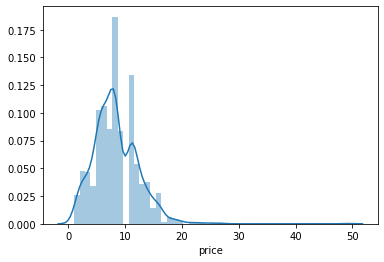

In [41]:
import seaborn as sns

# Distribution plot on price
sns.distplot(df['price'])

上面的代码生成了数据集中所有产品的价格分布图。最明显和最有趣的发现是，没有任何产品的价格为10欧元。这可能是商家为使他们的产品进入“10欧元及以下”的清单故意为之。

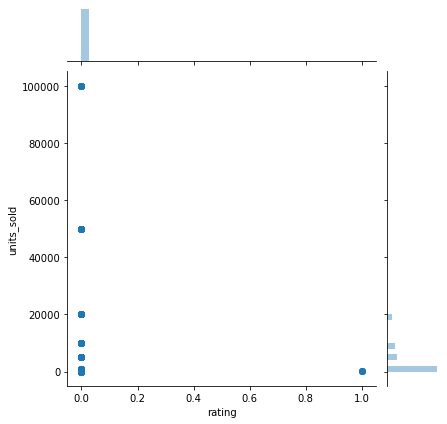

In [43]:
sns.jointplot(x ="rating",y ="units_sold",data = df,kind ="scatter")

从上图可以看出，绝大部分的销售都是由三星到四星半的产品贡献的。图中还显示大多数产品的销量少于20,000，而少数产品的销量分别达到了60,000和100,000。

顺便说一句，散点图呈直线排列的趋势证明了销量更有可能是估计值而不是实际值。

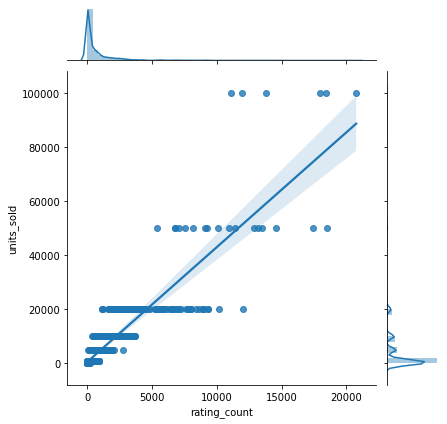

In [44]:
sns.jointplot(x ="rating_count",y ="units_sold",data = df,kind ="reg")

此图展示了评价的另一面。评价数量与产品销量之间存在着松散的正相关关系。这可能是因为消费者在考虑购买商品时会同时参考总体评分和评价数量，或者是因为畅销产品自然会产生更多评价。

由于没有关于购买时间和评价时间的额外数据，在没有额外领域知识的情况下很难辨别其相关原因。

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Divide the data between units sold and influencing factors
X = df.filter([
    "price",
    "discount",
    "uses_ad_boosts",
    "rating",
    "rating_count",
    "rating_five_percent",
    "rating_four_percent",
    "rating_three_percent",
    "rating_two_percent",
    "rating_one_percent",
    "has_urgency_banner",
    "merchant_rating",
    "merchant_rating_count",
    "merchant_has_profile_picture"
])

Y = df["units_sold"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 42)

在运行任何模型之前，前两行将引入相关的库。接下来几行创建两个变量X和Y，然后将数据集分为训练集和测试集。测试集大小赋值为0.33，这可以确保大约三分之二的数据集将用于训练数据，三分之一将用于测试数据的准确性。

In [46]:
# Set up and run the model
#接下来，初始化模型并开始运行。注意，参数n_estimators表示要使用的决策树的数量。
RFRegressor = RandomForestRegressor(n_estimators = 20)
RFRegressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=20)

In [47]:
predictions = RFRegressor.predict(X_test)
error = Y_test - predictions

In [48]:
error

1120        4.00
810      2700.00
1339        2.50
534      -200.00
514      2800.00
1522        0.00
522         2.50
274         0.00
494     -4800.00
65         22.00
669         2.50
1533    -2500.00
1479        4.45
777       -90.00
1010    -1500.00
1434       42.00
351     -1250.00
849      -600.00
29          0.00
30       -605.00
1542        0.00
1564    -1850.00
527      -180.00
1521        0.00
1063        5.00
802      -180.00
1084        0.00
324     -1000.00
706      1250.00
1087      -45.00
59          0.00
1260        0.00
701         0.00
816        15.00
887         0.00
704         0.00
1177      450.00
678         0.00
500      3500.00
23       1600.00
374         2.50
32      -1000.00
1001     -200.00
1299     -405.00
601         0.00
1024      675.00
1448        0.00
344      -555.00
798     -1200.00
1181        0.00
173         5.00
994      -600.00
380      3200.00
626      -400.00
985       -22.50
1305       44.00
820         0.00
141     -6000.00
1268      135.